<a href="https://colab.research.google.com/github/fachiny17/fruit_vision/blob/main/fruit_and_vegies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit and Vegies Project

## Setup (Colab and Kaggle)

In [ ]:
from google.colab import files
files.upload()   # upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\n  "username": "favourchisomiheanyi",\n  "key": "KGAT_1ac8e3e249375d93a8f29642a53bd99f"\n}\n'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset into the Colab
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 99% 4.58G/4.61G [01:01<00:00, 48.9MB/s]
100% 4.61G/4.61G [01:01<00:00, 79.8MB/s]


In [ ]:
# Get aider function file
!wget https://raw.githubusercontent.com/fachiny17/machine_learning/refs/heads/main/tensorflow_course/aider_functions.py

--2025-11-28 21:58:58--  https://raw.githubusercontent.com/fachiny17/machine_learning/refs/heads/main/tensorflow_course/aider_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2658 (2.6K) [text/plain]
Saving to: ‘aider_functions.py’

aider_functions.py  100%[===================>]   2.60K  --.-KB/s    in 0s      

2025-11-28 21:58:59 (45.0 MB/s) - ‘aider_functions.py’ saved [2658/2658]



In [ ]:
# Import some aider functions
from aider_functions import unzip_data, walk_through_dir, create_tensorboard_callback

In [ ]:
# Unzip the dataset
!unzip fruits.zip -d fruits360

Streaming output truncated to the last 5000 lines.
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_157.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_161.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_165.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_169.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_17.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_173.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_177.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_181.jpg  
  inflating: fruits360/fruits-360_original-size/fruits-360-original-size/Validation/Quince 3/r2_185.jp

In [ ]:
# How many images/classes are there?
walk_through_dir('fruits360/fruits-360_100x100/fruits-360')

There are 2 directories and 2 images in 'fruits360/fruits-360_100x100/fruits-360'.
There are 227 directories and 0 images in 'fruits360/fruits-360_100x100/fruits-360/Test'.
There are 0 directories and 164 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Grapefruit White 1'.
There are 0 directories and 164 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Cherry Wax Black 1'.
There are 0 directories and 228 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Tomato 10'.
There are 0 directories and 153 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Pomelo Sweetie 1'.
There are 0 directories and 229 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Apple 7'.
There are 0 directories and 164 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Redcurrant 1'.
There are 0 directories and 77 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Beans 1'.
There are 0 directories and 160 images in 'fruits360/fruits-360_100x100/fruits-360/Test/Nectarine Flat 1

In [ ]:
train_dir = 'fruits360/fruits-360_100x100/fruits-360/Training'
test_dir = 'fruits360/fruits-360_100x100/fruits-360/Test'

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
#BATCH_SIZE=32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=None,
                                                                shuffle=False)

Found 119252 files belonging to 227 classes.
Found 39768 files belonging to 227 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomContrast(0.2)
    # layers.Rescaling(1./255) # keep for ResNet50V2, reove for EfficientNetB0
], name="data_augmentation")

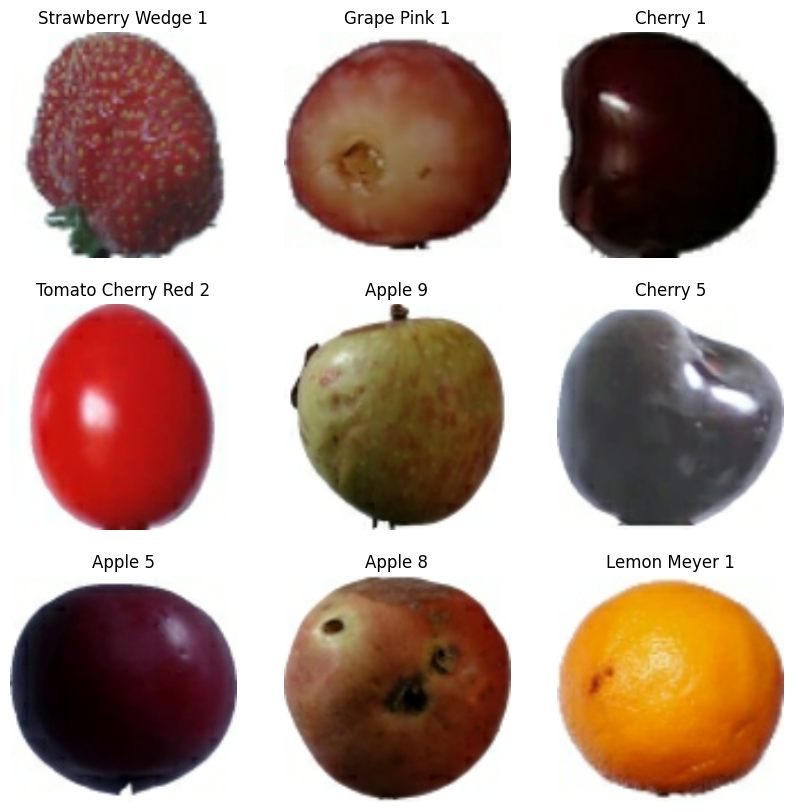

In [ ]:
# Show 9 sample images

import matplotlib.pyplot as plt

class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for image, label in train_data.take(1):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i].numpy().argmax()])
    plt.axis("off")

In [ ]:
# Check class count
len(class_names)

227

## Create preprocessing functions for our data

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  # Images are already resized by image_dataset_from_directory,
  # so tf.image.resize is redundant and causing dimension errors.
  # Only cast the image to float32.
  return tf.cast(image, tf.float32), label

In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>

Image after preprocessing
 [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


## Batch and prepare datasets

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 227), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 227), dtype=tf.float32, name=None))>)

## Create modelling callbacks

In [ ]:
#import datetime
#
#def create_tensorboard_callback(dir_name, experiment_name):
#  """
#  Creates a TensorBoard callback instand to store log files.
#
#  Stores log files with the filepath:
#    "dir_name/experiment_name/current_datetime/"
#
#  Args:
#    dir_name: target directory to store TensorBoard log files
#    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
#  """
#  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#  tensorboard_callback = tf.keras.callbacks.TensorBoard(
#      log_dir=log_dir
#  )
#  print(f"Saving TensorBoard log files to: {log_dir}")
#  return tensorboard_callback

In [ ]:
# Create checkpoint to save model for later use
#from aider_functions import create_tensorboard_callback

checkpoint_path = "fruits_model_checkpoints/cp.weights.h5" # Changed filepath to end with .weights.h5
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0) # don't print whether or not model is being saved

## Setup Mixed precision

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

## Build feature extraction model

In [ ]:
from tensorflow.keras import layers

def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable=False

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # x = layers.Rescaling(1./255)(x) # but EfficientNetBX has built-in rescaling
  x = data_augmentation(inputs)
  x = base_model(x, training=False)
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = layers.Dense(len(class_names))(x)
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model

# Create and compile the model
created_model = create_model()
created_model.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

In [ ]:
created_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 227)            │       290,787 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 227)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,358 (16.56 MB)

 Trainable params: 290,787 (1.11 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Checking layer dtype policies (are we using mixed precision?)

In [ ]:
# Check the dtype_policy attributes of layers in our model
for layer in created_model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # Check the dtype policy of layers

input_layer True float32 <DTypePolicy "mixed_float16">
data_augmentation True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
pooling_layer True float32 <DTypePolicy "mixed_float16">
dense_5 True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in created_model.layers[2].layers[:20]: # only check the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_7 False float32 <DTypePolicy "mixed_float16">
rescaling_10 False float32 <DTypePolicy "mixed_float16">
normalization_5 False float32 <DTypePolicy "mixed_float16">
rescaling_11 False float32 <DTypePolicy "mixed_float16">
stem_conv_pad False float32 <DTypePolicy "mixed_float16">
stem_conv False float32 <DTypePolicy "mixed_float16">
stem_bn False float32 <DTypePolicy "mixed_float16">
stem_activation False float32 <DTypePolicy "mixed_float16">
block1a_dwconv False float32 <DTypePolicy "mixed_float16">
block1a_bn False float32 <DTypePolicy "mixed_float16">
block1a_activation False float32 <DTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <DTypePolicy "mixed_float16">
block1a_se_reshape False float32 <DTypePolicy "mixed_float16">
block1a_se_reduce False float32 <DTypePolicy "mixed_float16">
block1a_se_expand False float32 <DTypePolicy "mixed_float16">
block1a_se_excite False float32 <DTypePolicy "mixed_float16">
block1a_project_conv False float32 <DTypePolicy "mixed_

## Fit the feature extraction model

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history_fruit360_feature_extract = created_model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_fruit360_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_fruit360_feature_extract/20251128-230925
Epoch 1/3
 520/3727 ━━━━━━━━━━━━━━━━━━━━ 6:08:37 7s/step - accuracy: 0.4684 - loss: 3.0222